# **PRÁCTICA 3: GANs - Parte 1: GANs simples**
### Universitat de València, Escola Tecnica Superior d'Enginyeria
### Elena Marrero Castellano | 4ª curso del Grado Ciencia de Datos


## **Ejercicio 3.1:** 
- **Modifica el código para balancear cuanto aprende el generador y cuanto el discriminador.** 

## **Ejercicio 3.2:** 
- **Crea un modelo que incluya todas las modificaciones de los tres ejercicios anteriores. + Ejercicio 3.1.** 

### Importamos librerías 

In [13]:
from numpy import zeros
from numpy import ones
from numpy.random import randn
from numpy.random import randint
from tensorflow.keras.datasets.cifar10 import load_data
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Reshape
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Conv2DTranspose
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.layers import Dropout
from matplotlib import pyplot

import matplotlib.pyplot as plt
import numpy as np

#### Cargamos conjunto de datos

In [14]:
(trainX, y_train), (x_test, y_test) = load_data()

In [15]:
print("X_train.shape =", trainX.shape, "Y_train.shape =", y_train.shape)
print("X_test.shape =", x_test.shape, "Y_test.shape =", y_test.shape)

X_train.shape = (50000, 32, 32, 3) Y_train.shape = (50000, 1)
X_test.shape = (10000, 32, 32, 3) Y_test.shape = (10000, 1)


#### Visualizamos cifar10

In [16]:
num_clases = 10
clases = ["airplane", "automobile", "bird", "cat", "deer", 
                   "dog", "frog", "horse", "ship", "truck"]

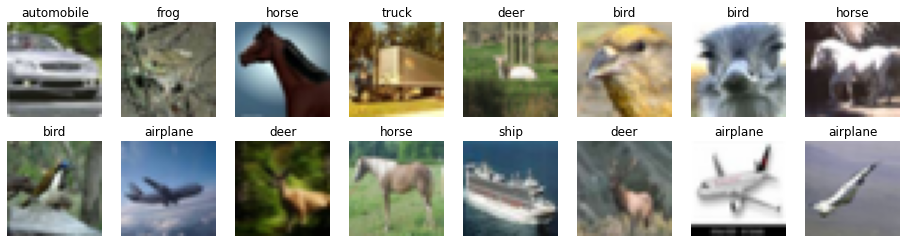

In [18]:
cols = 8 # número de columnas
rows = 2 # número de filas

fig = plt.figure(figsize=(2 * cols, 2 * rows))
for col in range(cols):
    for row in range(rows):
        random_index = np.random.randint(0, len(y_train)) 
        ax = fig.add_subplot(rows, cols, col * rows + row + 1) 
        ax.grid(b=False) 
        ax.axis("off") 
        ax.imshow(trainX[random_index, :]) 
        ax.set_title(clases[y_train[random_index][0]]) 
plt.show() 

#### Pre-procesamiento del set de datos

In [19]:
# convert from unsigned ints to floats
X = trainX.astype('float32')
# scale from [0,255] to [-1,1]
X = (X - 127.5) / 127.5

#### Diseñamos modelo

In [22]:
n_nodes = 256 * 4 * 4
OPTIMZADOR_ADAM = Adam(lr=0.0002, beta_1=0.5, decay=8e-8)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [23]:
model_gen = Sequential()

# FC: 4x4x256
model_gen.add(Dense(n_nodes, input_dim=latent_dim))
model_gen.add(LeakyReLU(alpha=0.2))
# model_gen.add(BatchNormalization(#momentum=0.8))
model_gen.add(Reshape((4, 4, 256)))

# Conv 1: upsample to 8x8
model_gen.add(Conv2DTranspose(128, (4, 4), strides=(2, 2), padding='same'))
model_gen.add(LeakyReLU(alpha=0.2))
# model_gen.add(BatchNormalization(#momentum=0.8))

# Conv 2: upsample to 16x16
model_gen.add(Conv2DTranspose(128, (4, 4), strides=(2, 2), padding='same'))
model_gen.add(LeakyReLU(alpha=0.2))
# model_gen.add(BatchNormalization(#momentum=0.8))

# Conv 3: upsample to 32x32
model_gen.add(Conv2DTranspose(128, (4, 4), strides=(2, 2), padding='same'))
model_gen.add(LeakyReLU(alpha=0.2))
# model_gen.add(BatchNormalization(#momentum=0.8))

# output layer
model_gen.add(Conv2D(3, (3, 3), activation='tanh', padding='same'))

model_gen.summary()
model_gen.compile(loss='binary_crossentropy', optimizer=OPTIMZADOR_ADAM)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 4096)              413696    
                                                                 
 leaky_re_lu_8 (LeakyReLU)   (None, 4096)              0         
                                                                 
 reshape_1 (Reshape)         (None, 4, 4, 256)         0         
                                                                 
 conv2d_transpose_3 (Conv2DT  (None, 8, 8, 128)        524416    
 ranspose)                                                       
                                                                 
 leaky_re_lu_9 (LeakyReLU)   (None, 8, 8, 128)         0         
                                                                 
 conv2d_transpose_4 (Conv2DT  (None, 16, 16, 128)      262272    
 ranspose)                                            

In [24]:
model_Disc = Sequential()

# normal
model_Disc.add(Conv2D(64, (3, 3), padding='same', input_shape=in_shape))
model_Disc.add(LeakyReLU(alpha=0.2))
# model_gen.add(BatchNormalization(#momentum=0.8))

# downsample
model_Disc.add(Conv2D(128, (3, 3), strides=(2, 2), padding='same'))
model_Disc.add(LeakyReLU(alpha=0.2))
# model_gen.add(BatchNormalization(#momentum=0.8))

# downsample
model_Disc.add(Conv2D(128, (3, 3), strides=(2, 2), padding='same'))
model_Disc.add(LeakyReLU(alpha=0.2))# model_gen.add(BatchNormalization(#momentum=0.8))

# downsample
model_Disc.add(Conv2D(256, (3, 3), strides=(2, 2), padding='same'))
model_Disc.add(LeakyReLU(alpha=0.2))# model_gen.add(BatchNormalization(#momentum=0.8))

# classifier
model_Disc.add(Flatten())
model_Disc.add(Dropout(0.4))
model_Disc.add(Dense(1, activation='sigmoid'))

# compile model
model_Disc.summary()
model_Disc.compile(loss='binary_crossentropy', optimizer=OPTIMZADOR_ADAM, metrics=['accuracy'])


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 32, 32, 64)        1792      
                                                                 
 leaky_re_lu_12 (LeakyReLU)  (None, 32, 32, 64)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 16, 16, 128)       73856     
                                                                 
 leaky_re_lu_13 (LeakyReLU)  (None, 16, 16, 128)       0         
                                                                 
 conv2d_8 (Conv2D)           (None, 8, 8, 128)         147584    
                                                                 
 leaky_re_lu_14 (LeakyReLU)  (None, 8, 8, 128)         0         
                                                                 
 conv2d_9 (Conv2D)           (None, 4, 4, 256)        

In [25]:
# make weights in the discriminator not trainable
model_Disc.trainable = False

# connect them    
model_gan = Sequential()
# add generator
model_gan.add(model_gen)
# add the discriminator
model_gan.add(model_Disc)

# compile model
model_gan.compile(loss='binary_crossentropy', optimizer=OPTIMZADOR_ADAM)
model_gan.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_3 (Sequential)   (None, 32, 32, 3)         1466115   
                                                                 
 sequential_4 (Sequential)   (None, 1)                 522497    
                                                                 
Total params: 1,988,612
Trainable params: 1,466,115
Non-trainable params: 522,497
_________________________________________________________________


In [26]:
# select real samples
def generate_real_samples(dataset, n_samples):
    # choose random instances
    ix = randint(0, dataset.shape[0], n_samples)
    # retrieve selected images
    X = dataset[ix]
    # generate 'real' class labels (1)
    y = ones((n_samples, 1))
    return X, y

# generate points in latent space as input for the generator
def generate_latent_points(latent_dim, n_samples):
    # generate points in the latent space
    x_input = randn(latent_dim * n_samples)
    # reshape into a batch of inputs for the network
    x_input = x_input.reshape(n_samples, latent_dim)
    return x_input

# use the generator to generate n fake examples, with class labels
def generate_fake_samples(g_model, latent_dim, n_samples):
    # generate points in latent space
    x_input = generate_latent_points(latent_dim, n_samples)
    # predict outputs
    X = g_model.predict(x_input)
    # create 'fake' class labels (0)
    y = zeros((n_samples, 1))
    return X, y

In [29]:
latent_dim = 100 # size of the latent space
n_epochs=10; n_batch=128
bat_per_epo = int(trainX.shape[0] / n_batch)
half_batch = int(n_batch / 2)

# manually enumerate epochs
for i in range(n_epochs):
    # enumerate batches over the training set
    for j in range(bat_per_epo):
        # get randomly selected 'real' samples
        X_real, y_real = generate_real_samples(trainX, half_batch)
        # update discriminator model weights
        d_loss1, label_d1 = model_Disc.train_on_batch(X_real, y_real)
        # generate 'fake' examples
        X_fake, y_fake = generate_fake_samples(model_gen, latent_dim, half_batch)
        # update discriminator model weights
        d_loss2, label_d2 = model_Disc.train_on_batch(X_fake, y_fake)
        # prepare points in latent space as input for the generator
        X_gan = generate_latent_points(latent_dim, n_batch)
        # create inverted labels for the fake samples
        y_gan = ones((n_batch, 1))
        # update the generator via the discriminator's error
        g_loss = model_gan.train_on_batch(X_gan, y_gan)
        # summarize loss on this batch
        if j % 100 == 0:
            print('>%d, %d/%d, d1=%.3f, d2=%.3f g=%.3f' % (i + 1, j + 1, bat_per_epo, d_loss1, d_loss2, g_loss))

>1, 1/390, d1=0.000, d2=0.000 g=11.400
>1, 101/390, d1=0.000, d2=0.000 g=11.625
>1, 201/390, d1=0.000, d2=0.000 g=11.845
>1, 301/390, d1=0.000, d2=0.000 g=11.875
>2, 1/390, d1=0.000, d2=0.000 g=12.147
>2, 101/390, d1=0.000, d2=0.000 g=12.383
>2, 201/390, d1=0.000, d2=0.000 g=12.401
>2, 301/390, d1=0.000, d2=0.000 g=12.569
>3, 1/390, d1=0.000, d2=0.000 g=12.742
>3, 101/390, d1=0.000, d2=0.000 g=12.868
>3, 201/390, d1=0.000, d2=0.000 g=12.901
>3, 301/390, d1=0.000, d2=0.000 g=12.924
>4, 1/390, d1=0.000, d2=0.000 g=13.052
>4, 101/390, d1=0.000, d2=0.000 g=13.122
>4, 201/390, d1=0.000, d2=0.000 g=13.309
>4, 301/390, d1=0.000, d2=0.000 g=13.465
>5, 1/390, d1=0.000, d2=0.000 g=13.526
>5, 101/390, d1=0.000, d2=0.000 g=13.681
>5, 201/390, d1=0.000, d2=0.000 g=13.785
>5, 301/390, d1=0.000, d2=0.000 g=13.939
>6, 1/390, d1=0.000, d2=0.000 g=14.160
>6, 101/390, d1=0.000, d2=0.000 g=14.193
>6, 201/390, d1=0.000, d2=0.000 g=14.378
>6, 301/390, d1=0.000, d2=0.000 g=14.563
>7, 1/390, d1=0.000, d2=0.00

Curvas de aprendizaje

In [ ]:
% matplotlib inline 
plt.figure
plt.plot(d_loss1)
plt.plot(d_loss2)
plt.plot(g_loss)

#### Generar datos

In [31]:
# Generamos imagen sintética
gen_noise = np.random.normal(0, 1, (np.int64(10), 100))
syntetic_images = model_gen.predict(gen_noise)

In [ ]:
#syntetic_imagenes = syntetic_images[:,0:-1].reshape(numero, 28,28,1)
label = np.around(syntetic_images[:,-1] * 4.5 + 4.5)

(-0.5, 31.5, 31.5, -0.5)

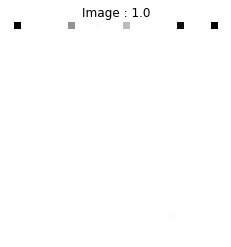

In [44]:
# Mostramos imagen sintética
plt.imshow(syntetic_images[5,:,:,0],cmap='gray')
plt.title("Image : {}".format(label_d1))
plt.axis('off')

cat


(-0.5, 31.5, 31.5, -0.5)

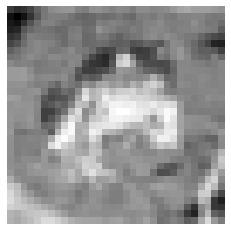

In [54]:
# Esto es una imagen real (por comparar)
plt.imshow(trainX[0,:,:,0],cmap='gray')
plt.axis('off')

In [51]:
for col in range(cols):
    for row in range(rows):
        random_index = np.random.randint(0, len(y_train)) 
        ax = fig.add_subplot(rows, cols, col * rows + row + 1) 
        ax.grid(b=False) 
        ax.axis("off") 
        ax.imshow(trainX[random_index, :]) 
        ax.set_title(clases[y_train[random_index][0]]) 
plt.show() 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.
